## Handwritten Image Detection with Keras using MNIST

In this exercise we will work with image data: specifically the famous MNIST data set.  MNIST data set contains 70,000 images of handwritten digits in grayscale (0=black, 255 = white). All the images are 28 pixels by 28 pixels for a total of 784 pixels.  This is quite small by image standards.  Also, the images are well centered and isolated.  This makes this problem solvable with standard fully connected neural nets without too much pre-work. <br><br>
We will use a Convolutional Neural Network and compare it with a linear neural network.

In the first part of this notebook, we will walk you through loading in the data, building a network, and training it.  Then it will be your turn to try different models and see if you can improve performance

In [27]:
# Set Keras backend to PyTorch for Keras 3
import os
os.environ["KERAS_BACKEND"] = "torch"

# Importing Libraries
from __future__ import print_function

import keras
from keras.datasets import mnist, fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's explore the dataset a little bit

In [28]:
# Load the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [29]:
# Checking shape of data

print(f'Shape of training features: {X_train.shape}')
print(f'Shape of training labels: {y_train.shape}')
print(f'Shape of testing features: {X_test.shape}')
print(f'Shape of testing labels: {y_test.shape}')

Shape of training features: (60000, 28, 28)
Shape of training labels: (60000,)
Shape of testing features: (10000, 28, 28)
Shape of testing labels: (10000,)


In [30]:
# Let's just look at a particular example to see what is inside

idx = 10210
print(X_train[idx])
print(X_train[idx].shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   9   7   3   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  14 100 145 222 201 125 128  25   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  25 211 252 252 252 252 252 252 211 100   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 132 252 252 252 252 252 252 252 252 252 164  21   

In [31]:
# What is the corresponding label in the training set?

print(y_train[idx])

3


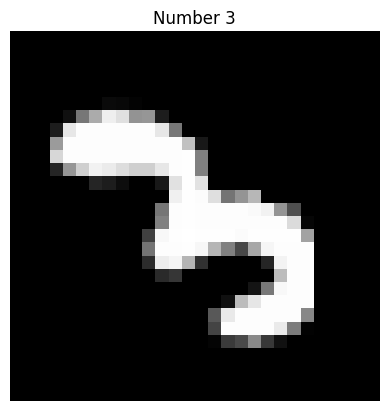

In [32]:
# Let's see what this image actually looks like

plt.imshow(X_train[idx], cmap='Greys_r')
plt.axis('off')
plt.title(f'Number {y_train[idx]}')
plt.show()

In [33]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

## Keras works with floats, so we must cast the numbers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
X_train /= 255
X_test /= 255

In [34]:
# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[idx]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

# Building a Artifical Neural Net

In [35]:
# We will build a model with two hidden layers of size 64
# Fully connected inputs at each layer
# We will use dropout of 0.2 to help regularize

model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(28*28,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation='softmax'))

## Note that this model has a LOT of parameters
model_1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Let's compile the model
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=learning_rate),
              metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization
# of the loss function we had in binary classification case, to multi class case

In [37]:
from sklearn.model_selection import train_test_split

# Split the data into train/validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.15,
    random_state=42,
    stratify=np.argmax(y_train, axis=1)
)

print(f"Train: {X_train.shape}, Val: {X_val.shape}")
print(f"Train labels: {y_train.shape}, Val labels: {y_val.shape}")

Train: (51000, 784), Val: (9000, 784)
Train labels: (51000, 10), Val labels: (9000, 10)


In [ ]:
# And now let's fit.

batch_size = 128
epochs = 50
history = model_1.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_val, y_val))

Epoch 1/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8345 - loss: 0.5524 - val_accuracy: 0.9296 - val_loss: 0.2378
Epoch 2/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8345 - loss: 0.5524 - val_accuracy: 0.9296 - val_loss: 0.2378
Epoch 2/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9198 - loss: 0.2719 - val_accuracy: 0.9468 - val_loss: 0.1844
Epoch 3/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9198 - loss: 0.2719 - val_accuracy: 0.9468 - val_loss: 0.1844
Epoch 3/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9367 - loss: 0.2148 - val_accuracy: 0.9532 - val_loss: 0.1623
Epoch 4/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9367 - loss: 0.2148 - val_accuracy: 0.9532 - val_loss: 0.1623
Epoch 4/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9453 - loss: 0.1847 - val_accuracy: 0.9572 - val_loss: 0.1469
Epoch 5/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9453 - loss: 0.1847 - val_ac

### Evaluate on the X_test and y_test (Hint: Use evaluate() on model_1)
https://www.tensorflow.org/api_docs/python/tf/keras/Model

In [ ]:
# Evaluate model_1 on the test set
results = model_1.evaluate(X_test, y_test, verbose=0, return_dict=True)
print(f"Test loss:     {results['loss']:.4f}")
print(f"Test accuracy: {results.get('accuracy', results.get('acc', float('nan'))):.4%}")

Test loss:     0.1130
Test accuracy: 97.6600%


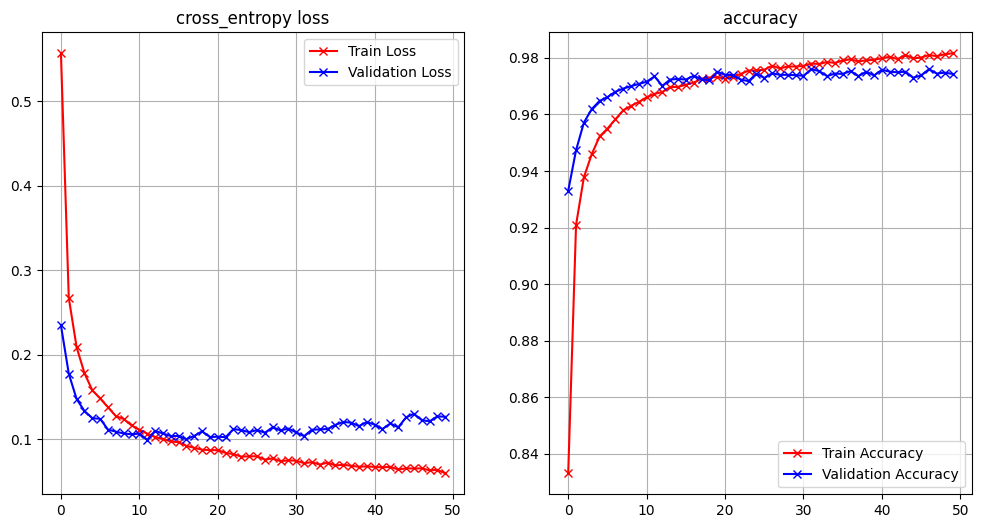

In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

The training loss is decreasing but validation loss is increasing. The model is overfitted to the data!

Epoch 1/10
  4/399 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.1160 - loss: 2.2959

C:\Users\mokah\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


399/399 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8346 - loss: 0.5482 - val_accuracy: 0.9263 - val_loss: 0.2470
Epoch 2/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8346 - loss: 0.5482 - val_accuracy: 0.9263 - val_loss: 0.2470
Epoch 2/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9198 - loss: 0.2705 - val_accuracy: 0.9437 - val_loss: 0.1883
Epoch 3/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9198 - loss: 0.2705 - val_accuracy: 0.9437 - val_loss: 0.1883
Epoch 3/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9362 - loss: 0.2143 - val_accuracy: 0.9502 - val_loss: 0.1611
Epoch 4/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9362 - loss: 0.2143 - val_accuracy: 0.9502 - val_loss: 0.1611
Epoch 4/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9452 - loss: 0.1855 - val_accuracy: 0.9562 - val_loss: 0.1425
Epoch 5/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9452 - loss: 0.1855 - val_accuracy: 0.956

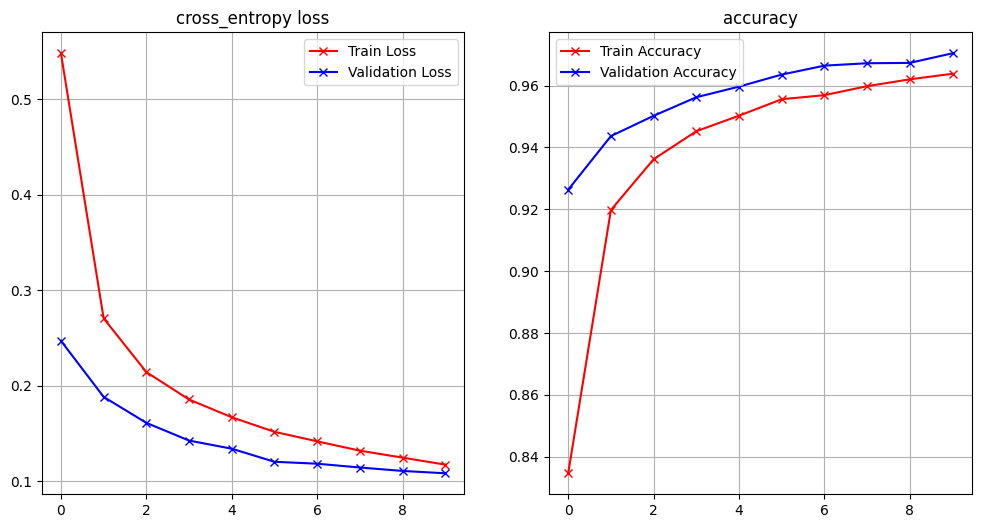

In [ ]:
# Let's try 10 epochs

model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(28*28,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation='softmax'))
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=learning_rate),
              metrics=['accuracy'])

batch_size = 128
epochs = 10
history = model_1.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_val, y_val))

plot_loss_accuracy(history)

This is reasonably good performance. But, can we do better?

# Convolutional Neural Network

Use the Keras "Sequential" functionality to build a convolutional neural network `model_2`



### Reshape the X_train, X_test, X_val to a 28 x 28 matrix with the same name

In [ ]:
# Data is currently flattened i.e. m X 784, we need to reshape it back to 28 * 28. To do that we reshape the data.

X_train = np.reshape(X_train, [-1, 28, 28])
X_test = np.reshape(X_test, [-1, 28, 28])
X_val = np.reshape(X_val, [-1, 28, 28])

print(f'Shape of training features: {X_train.shape}')
print(f'Shape of testing features: {X_test.shape}')
print(f'Shape of validation features: {X_val.shape}')

Shape of training features: (51000, 28, 28)
Shape of testing features: (10000, 28, 28)
Shape of validation features: (9000, 28, 28)


In [ ]:
# Convolutional model requires input to be of 3 dimensions. We will add a channel dimension to it.

X_train = np.reshape(X_train, [-1, 28, 28, 1])
X_test = np.reshape(X_test, [-1, 28, 28, 1])
X_val = np.reshape(X_val, [-1, 28, 28, 1])

print(f'Shape of training features: {X_train.shape}')
print(f'Shape of testing features: {X_test.shape}')
print(f'Shape of validation features: {X_val.shape}')

Shape of training features: (51000, 28, 28, 1)
Shape of testing features: (10000, 28, 28, 1)
Shape of validation features: (9000, 28, 28, 1)


### Write your model below
https://keras.io/api/layers/convolution_layers/convolution2d/ \
https://keras.io/api/layers/pooling_layers/max_pooling2d/ \
https://keras.io/api/layers/reshaping_layers/flatten/

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

model_2 = Sequential()
# A conv layer with 5 filters, kernel size of 3 x 3, relu activation , input shape (28, 28, 1)
model_2.add(Conv2D(filters=5, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model_2.add(MaxPooling2D(2,2))
model_2.add(Dropout(0.2))

# COMPLETE THE NEURAL NET
# A conv layer with 5 filters, kernel size of 3 x 3, relu activation
model_2.add(Conv2D(filters=5, kernel_size=(3,3), activation='relu'))
# A max pooling of 2x2
model_2.add(MaxPooling2D(2,2))
# A Flatten layer
model_2.add(Flatten())
# A dropout layer of 0.2
model_2.add(Dropout(0.2))
# A dense layer with 100 units with relu activation
model_2.add(Dense(100, activation='relu'))
# A dense layer with 10 units with softmax activation
model_2.add(Dense(10, activation='softmax'))

model_2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 5)      │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 5)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 13, 13, 5)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 5)      │           230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 5)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 125)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 125)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        12,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,890 (54.26 KB)

 Trainable params: 13,890 (54.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile using the same parameter
learning_rate = learning_rate  # reuse from above
model_2.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=learning_rate),
    metrics=['accuracy']
)

In [ ]:
# And now let's fit.

batch_size = 128
epochs = 10
history = model_2.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_val, y_val))

Epoch 1/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.7693 - loss: 0.7283 - val_accuracy: 0.9202 - val_loss: 0.2752
Epoch 2/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.7693 - loss: 0.7283 - val_accuracy: 0.9202 - val_loss: 0.2752
Epoch 2/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.8950 - loss: 0.3301 - val_accuracy: 0.9517 - val_loss: 0.1675
Epoch 3/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.8950 - loss: 0.3301 - val_accuracy: 0.9517 - val_loss: 0.1675
Epoch 3/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.9188 - loss: 0.2516 - val_accuracy: 0.9603 - val_loss: 0.1370
Epoch 4/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.9188 - loss: 0.2516 - val_accuracy: 0.9603 - val_loss: 0.1370
Epoch 4/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.9319 - loss: 0.2128 - val_accuracy: 0.9629 - val_loss: 0.1171
Epoch 5/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.9319 - loss: 0.2128 - 

### Evaluate on the X_test and y_test (Hint: Use evaluate() on model_2)
https://www.tensorflow.org/api_docs/python/tf/keras/Model

In [ ]:
## We will use Keras evaluate function to evaluate performance on the test set

results_2 = model_2.evaluate(X_test, y_test, verbose=0, return_dict=True)
print(f"CNN Test loss:     {results_2['loss']:.4f}")
print(f"CNN Test accuracy: {results_2.get('accuracy', results_2.get('acc', float('nan'))):.4%}")

CNN Test loss:     0.0618
CNN Test accuracy: 98.0900%


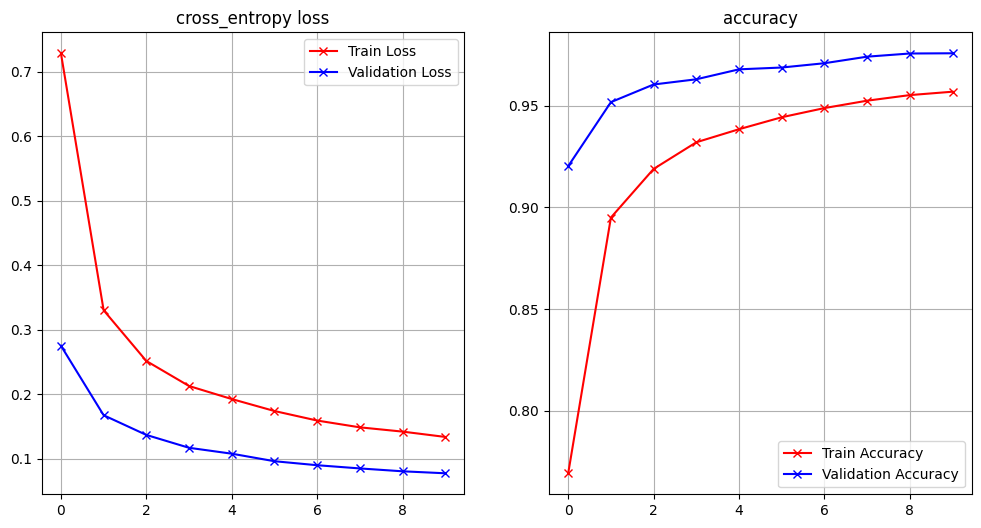

In [ ]:
plot_loss_accuracy(history)